In [1]:
import matplotlib.pyplot as plt
import numpy as np
from source.split_bregman_gcs import SplitBregmanGCS, NormalizationMode
from source.image_force import Force1
import cv2 as cv
from source.utils import normalization_automatic

# The Split Bregman Method Applied to Globally Convex Segmentation

In [2]:
lambda_value = 1
nu_value = 0.5
epsilon_value=0.1
gs_error=1e-3

## Case 1

In [3]:
initial_level_set = cv.imread('test_images/simplify_cells_distance_multiply_10.tif', cv.CV_8U)
initial_level_set = normalization_automatic(initial_level_set)
image = cv.imread('test_images/simplify_cells.tif', cv.CV_16U) 
image = normalization_automatic(image)

----------------- Iteration error 0.8700236246608009 ------------------------


Gauss Seidel Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Gauss Seidel Iteration:  14%|█▍        | 1391/10000 [00:07<00:44, 192.01it/s]


The solution converged after 1391 iterations
----------------- Iteration error 0.18635288397859304 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1411/10000 [00:05<00:31, 272.44it/s]

The solution converged after 1411 iterations
Converged with an error 0.09026179992651986


<a list of 6 text.Text objects>

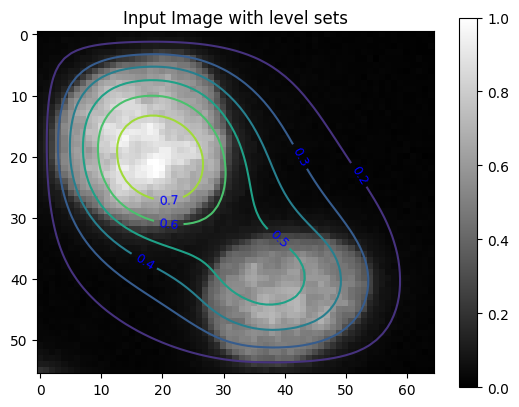

In [4]:
force1 = Force1(image, k1=1, k0=1)
segmentator = SplitBregmanGCS(
    force1,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    mode= NormalizationMode.FirstImageParameters,
    debug=False)

last_level_set, last_level_set_no_normalized = segmentator.run(
    initial_level_set)

fig, ax = plt.subplots(1,1)
ax.set_title('Input Image with level sets')
pos = ax.imshow(image, 'gray')
fig.colorbar(pos, ax=ax)
cs = ax.contour(last_level_set)
ax.clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

## Case 2

----------------- Iteration error 0.8747798755354009 ------------------------


Gauss Seidel Iteration: 10001it [11:20, 14.70it/s]                           


Solution did not converged within the maximum number of iterations. Last l2_diff was: 1.66488e-02
----------------- Iteration error 0.22866351095769394 ------------------------


Gauss Seidel Iteration: 10001it [11:13, 14.86it/s]                          

Solution did not converged within the maximum number of iterations. Last l2_diff was: 1.61701e-02
Converged with an error 0.09878384300639151


<a list of 6 text.Text objects>

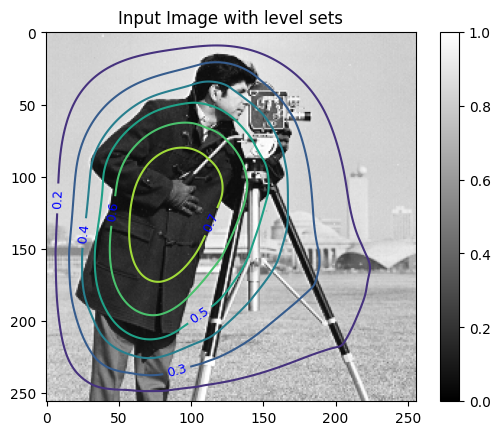

In [5]:
initial_level_set = cv.imread('test_images/cman_distance_map.tif', cv.CV_8U)
initial_level_set = normalization_automatic(initial_level_set)
image = cv.imread('test_images/cman.tif', cv.CV_8U) 
image = normalization_automatic(image)

force1 = Force1(image, k1=1, k0=1)
segmentator = SplitBregmanGCS(
    force1,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    mode= NormalizationMode.FirstImageParameters,
    debug=False)

last_level_set, last_level_set_no_normalized = segmentator.run(initial_level_set)

fig, ax = plt.subplots(1,1)
ax.set_title('Input Image with level sets')
pos = ax.imshow(image, 'gray')
fig.colorbar(pos, ax=ax)
cs = ax.contour(last_level_set)
ax.clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)